# Integration algorithms

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Left Hand Rule
$$
\int_a^b f(x) dx = h\sum_{i=1}^{n-1} f(x_i)
$$

In [2]:
# Left hand integration
def int_left(f,a,b,h):
    n = int((b-a)/h)
    dx = (b-a)/n
    x = np.linspace(a,b,n)
    A = np.empty(n)
    A[0] = 0.
    for i in range(1,n):
        A[i] = A[i-1]+f(x[i-1])
    A *= dx
    return x,A    

# Midpoint rule
$$
\int_a^b f(x) dx = h\sum_{i=1}^{n-1} f\left(x_i+\frac h2\right)
$$

In [3]:
# Midpoint integration
def int_mid(f,a,b,h):
    n = int((b-a)/h)
    dx = (b-a)/n
    x = np.linspace(a,b,n)
    A = np.empty(n)
    A[0]=0.
    for i in range(1,n):
        A[i] = A[i-1]+f(x[i-1]+.5*dx)
    A *= dx
    return x,A    

# Trapezoid Rule
$$
\int_a^b f(x) dx = \frac h2\sum_{i=1}^{n-2} \left[f\left(x_i\right)+f\left(x_{i+1}\right)\right]
$$

In [4]:
# Trapezoid Integration
def int_trap(f,a,b,h):
    n = int((b-a)/h)
    dx = (b-a)/n
    x = np.linspace(a,b,n)
    A = np.empty(n)
    A[0]=0.
    for i in range(1,n):
        A[i] = A[i-1]+(f(x[i-1])+f(x[i]))
    A *= dx/2.
    return x,A    

# Simpson's Rule
I'm going to split each interval to make the algorithm easier.
$$
\int_a^b f(x) dx = \frac h2\frac 13\sum_{i=1}^{n-1} \left[f\left(x_i\right)+4f\left(x_{i}+\frac h2\right)+\left(x_{i+11}\right)\right]
$$

In [5]:
# Simpson's rule.
# I'm going to make it like the others, but using the midpoint rather than three points at a time.
def int_simpson(f,a,b,h):
    n = int((b-a)/h)
    dx = (b-a)/n
    x = np.linspace(a,b,n)
    A = np.empty(n)
    A[0]=0.
    for i in range(1,n):
        A[i] = A[i-1]+(f(x[i-1])+4.*f(x[i-1]+.5*dx)+f(x[i]))
    A *= dx/2./3.
    return x,A    

# Function and Explicit Integral
\begin{align*}
f(x) &= x+\sin(x)\\
\int f(x)dx &= 1+\frac 12x^2 -\cos(x)
\end{align*}


In [6]:
# define my function
def f(x):
    return x+np.sin(x)
# Exact integral
def fint(x):
    return 1+x**2/2.-np.cos(x)


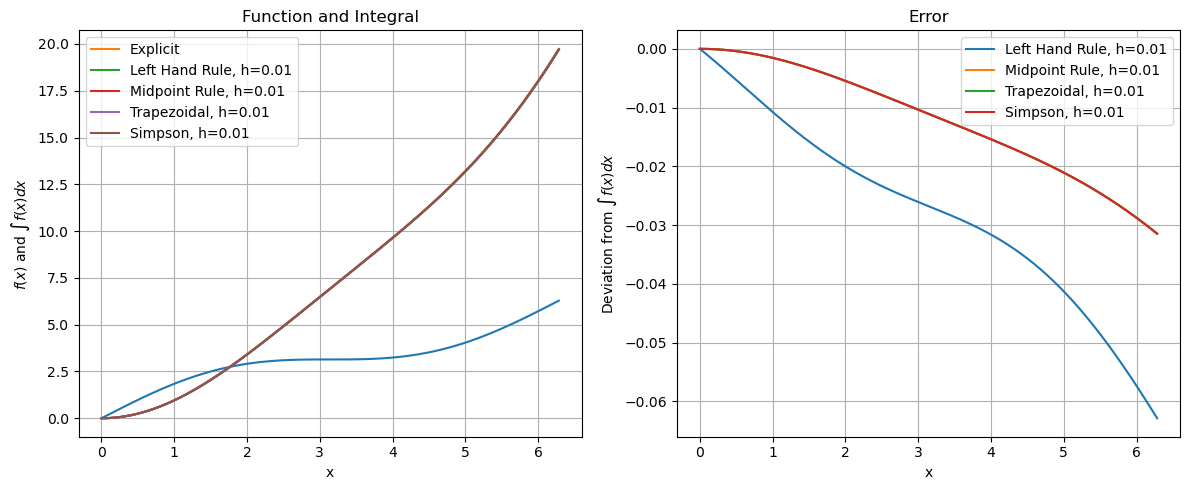

In [12]:
# Test
xmin,xmax = 0.,2*np.pi
h = .01

# Create two plots:
# One for the integral with each method
# One for the deviation from the exact integral
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.set_title('Function and Integral')
ax1.set_xlabel('x')
ax1.set_ylabel(r'$f(x)$ and $\int f(x) dx$')
ax2.set_title('Error')
ax2.set_xlabel('x')
ax2.set_ylabel(r'Deviation from $\int f(x) dx$')

x = np.linspace(xmin,xmax,100)
# Exact Integral
ax1.plot(x,f(x))
ax1.plot(x,fint(x),label='Explicit')

#Left hand rule
x,A = int_left(f,xmin,xmax,h)
ax1.plot(x,A,label=f'Left Hand Rule, h={h}')
ax2.plot(x,A-fint(x),label=f'Left Hand Rule, h={h}')

# Midpoint rule
x,A = int_mid(f,xmin,xmax,h)
ax1.plot(x,A,label=f'Midpoint Rule, h={h}')
ax2.plot(x,A-fint(x),label=f'Midpoint Rule, h={h}')

# Trapezoidal Rule
x,A = int_trap(f,xmin,xmax,h)
ax1.plot(x,A,label=f'Trapezoidal, h={h}')
ax2.plot(x,A-fint(x),label=f'Trapezoidal, h={h}')

# Simpson's Rule
x,A = int_simpson(f,xmin,xmax,h)
ax1.plot(x,A,label=f'Simpson, h={h}')
ax2.plot(x,A-fint(x),label=f'Simpson, h={h}')

# Legends, grids, etc
ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()

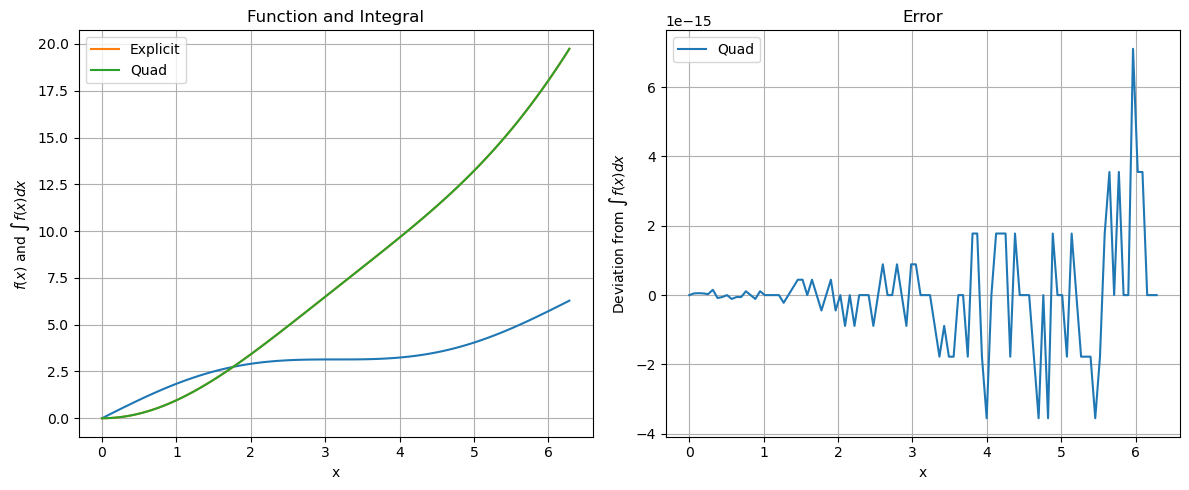

In [14]:
# Compare to built-in function
xmin,xmax = 0.,2*np.pi
h = .002

# Create two plots:
# One for the integral with each method
# One for the deviation from the exact integral
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.set_title('Function and Integral')
ax1.set_xlabel('x')
ax1.set_ylabel(r'$f(x)$ and $\int f(x) dx$')
ax2.set_title('Error')
ax2.set_xlabel('x')
ax2.set_ylabel(r'Deviation from $\int f(x) dx$')

x = np.linspace(xmin,xmax,100)
# Exact Integral
ax1.plot(x,f(x))
ax1.plot(x,fint(x),label='Explicit')

# The built-in function won't calculate a continuous integral, so I'll have to call it a bunch of times
from scipy.integrate import quad
A = np.empty(len(x))
A[0] = 0.
for i in range(1,len(A)):
    A[i] = quad(f,x[0],x[i])[0]

ax1.plot(x,A,label=f'Quad')
ax2.plot(x,A-fint(x),label=f'Quad')


# Legends, grids, etc
ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()